# Plot the trajectory of the modules vs significant hits

In [9]:
suppressMessages({
    library(tidyverse)
    library(magrittr)
})

In [6]:
PCs.path = "../../data/Figueroa/clusters/PCs.csv"
hits.path = "../../data/Figueroa/vBsr/hits.csv"
GEP.path = '../../data/Figueroa/processeddata/gep-transcription-related.tsv'

In [17]:
suppressMessages({
    PCs.data = read_csv(PCs.path)
    hits.data = read_csv(hits.path)
    GEP.data = read.table(GEP.path)
})

In [10]:
PCs.data %<>%
  arrange(i, patient)
head(PCs.data)

patient,PC1,i
GSM464737,0.1200306,0
GSM464738,0.5140701,0
GSM464739,-2.2663460,0
GSM464740,-0.2371844,0
GSM464741,-0.4458414,0
GSM464742,-0.5878808,0


In [5]:
head(hits.data)

hgnc_symbol,minuslogp,chromosome_name,start_position,tot,BPcum,i
ZNF518B,8.324342,4,10439874,687579651,698019525,0
PHYH,7.229188,10,13277796,1668564773,1681842569,0
CCL5,6.721012,17,35871491,2478158341,2514029832,0
VEZF1,7.552781,17,57971547,2478158341,2536129888,0
TMEM18,9.070527,2,667335,248850006,249517341,1
BMP10,6.324376,2,68865481,248850006,317715487,1


In [20]:
## select for one module and compare the trajectory between the PC with 
### 1. select for a module (say 0)
### 2. filter for gene probes that are in the hits
### 3. plot PCs vs gene probe 

PCs_module_0 = PCs.data %>% filter(i == 0)
hits_module_0 = hits.data %>% filter(i == 0) %>% select(hgnc_symbol) %>% unlist
GEP_module_0 = GEP.data[hits_module_0, sort(colnames(GEP.data))]

In [22]:
head(GEP_module_0)

,GSM464737,GSM464738,GSM464739,GSM464740,GSM464741,GSM464742,GSM464743,GSM464744,GSM464745,GSM464746,⋯,GSM465071,GSM465072,GSM465073,GSM465074,GSM465075,GSM465076,GSM465077,GSM465078,GSM465079,GSM465080
ZNF518B,199.2782,326.9229,226.6699,261.7793,141.8201,373.3506,165.9581,204.6483,626.5554,280.9129,⋯,400.2984,298.3010,229.1901,177.3725,310.8412,27.19982,225.1261,51.64703,216.3676,283.747
PHYH,582.9710,983.9146,746.8995,971.1244,550.0204,849.8533,993.9940,582.0606,801.9167,597.4155,⋯,1282.0013,732.5403,1418.6548,1090.2374,1006.0428,603.43621,569.6542,731.42558,1293.3080,1017.808
CCL5,1039.1039,1121.4115,606.5477,572.9749,927.5977,441.6513,305.0984,430.4694,221.8285,497.7623,⋯,893.0484,931.2811,891.6413,720.6235,1279.0272,455.00261,832.8641,658.82574,2990.3984,2109.465
VEZF1,1629.1397,1205.3419,2280.5952,1829.7953,2050.2632,1821.1949,1193.6900,1995.2098,1647.8507,1487.6604,⋯,970.9642,1059.8275,789.9563,791.6181,1602.0541,925.64527,1693.6333,1096.36002,926.5261,1484.877


In [25]:
plot_data_module_0 = data.frame(PC=PCs_module_0$PC1 %>% unlist) %>%
  cbind(., t(GEP_module_0))

In [26]:
head(plot_data_module_0)

,PC,ZNF518B,PHYH,CCL5,VEZF1
GSM464737,-0.8852895,199.2782,582.9710,1039.1039,1629.140
GSM464738,-0.5756675,326.9229,983.9146,1121.4115,1205.342
GSM464739,0.9839191,226.6699,746.8995,606.5477,2280.595
GSM464740,-1.5459145,261.7793,971.1244,572.9749,1829.795
GSM464741,-1.1551307,141.8201,550.0204,927.5977,2050.263
GSM464742,1.0983370,373.3506,849.8533,441.6513,1821.195


In [49]:
dim(plot_data_module_0)

[1] 344   5

In [44]:
number_patients = ncol(GEP.data)

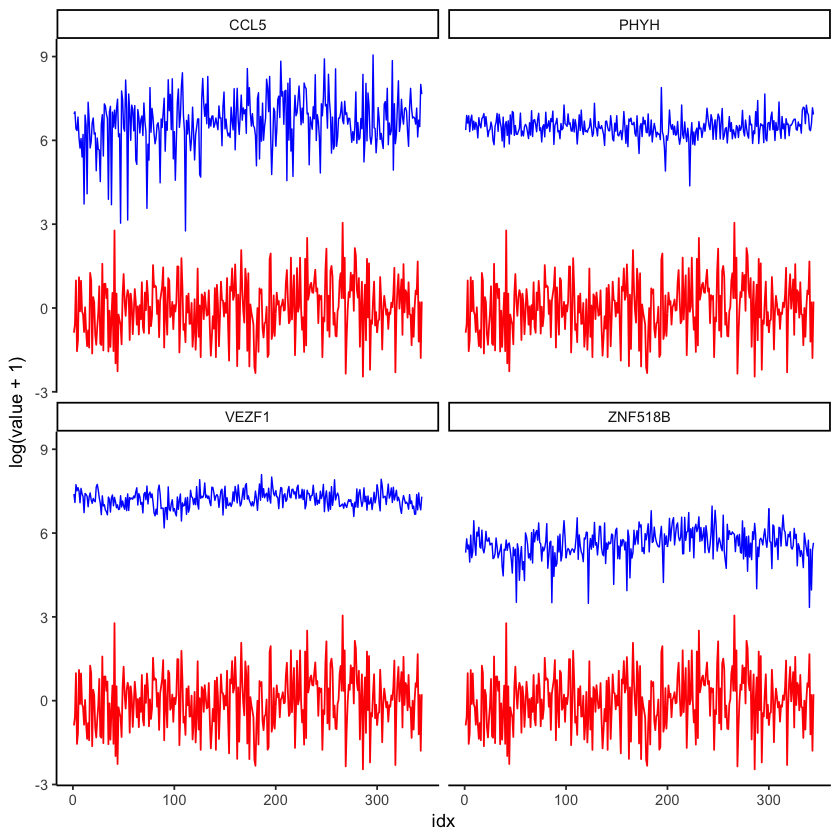

In [53]:
# trajectory doesn't seem to be a good idea....
plot_data_module_0 %>%
  mutate(idx = seq(number_patients)) %>%
  gather(gene, value, -c(PC, idx)) %>% 
  ggplot(data=.) + 
    geom_line(aes(x=idx, y=log(value+1)), color='blue', size=0.4) + 
    geom_line(aes(x=idx, y=PC), color='red', size=0.5) + 
    facet_wrap(~gene) + theme_classic()

In [ ]:
# plot the heatmap instead

